In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os
from google.colab import drive

In [2]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Dataset paths
train_dir = "/content/drive/MyDrive/Datasets/train"
test_dir = "/content/drive/MyDrive/Datasets/test"

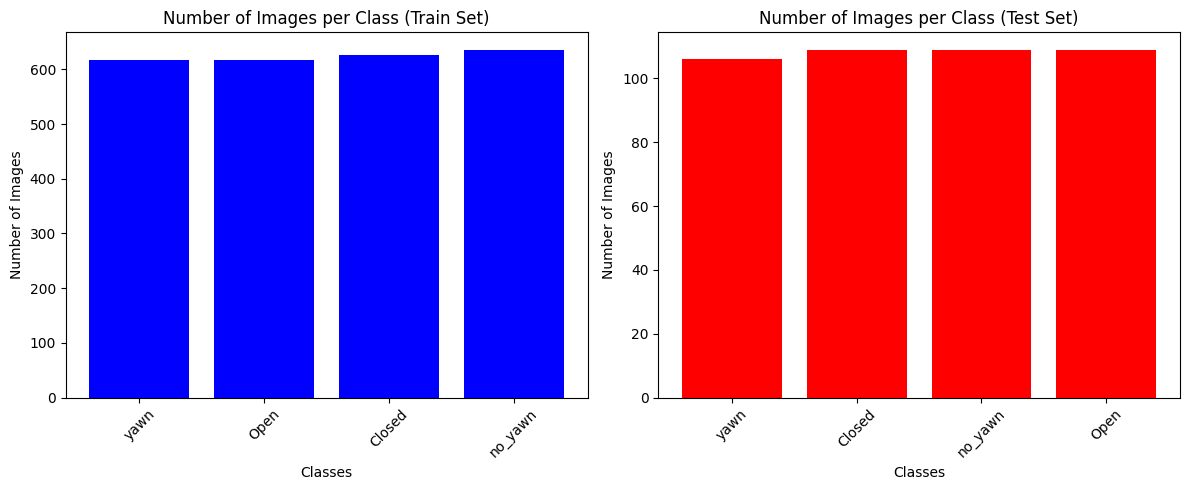

In [4]:
import os
import matplotlib.pyplot as plt

# Function to count images per class
def count_images_per_class(directory):
    class_counts = {}
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):  # Ensure it's a directory
            class_counts[class_name] = len(os.listdir(class_path))
    return class_counts

# Get counts for train and test sets
train_counts = count_images_per_class(train_dir)
test_counts = count_images_per_class(test_dir)

# Plot the distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Training set
axes[0].bar(train_counts.keys(), train_counts.values(), color='blue')
axes[0].set_title("Number of Images per Class (Train Set)")
axes[0].set_xlabel("Classes")
axes[0].set_ylabel("Number of Images")
axes[0].tick_params(axis='x', rotation=45)

# Test set
axes[1].bar(test_counts.keys(), test_counts.values(), color='red')
axes[1].set_title("Number of Images per Class (Test Set)")
axes[1].set_xlabel("Classes")
axes[1].set_ylabel("Number of Images")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

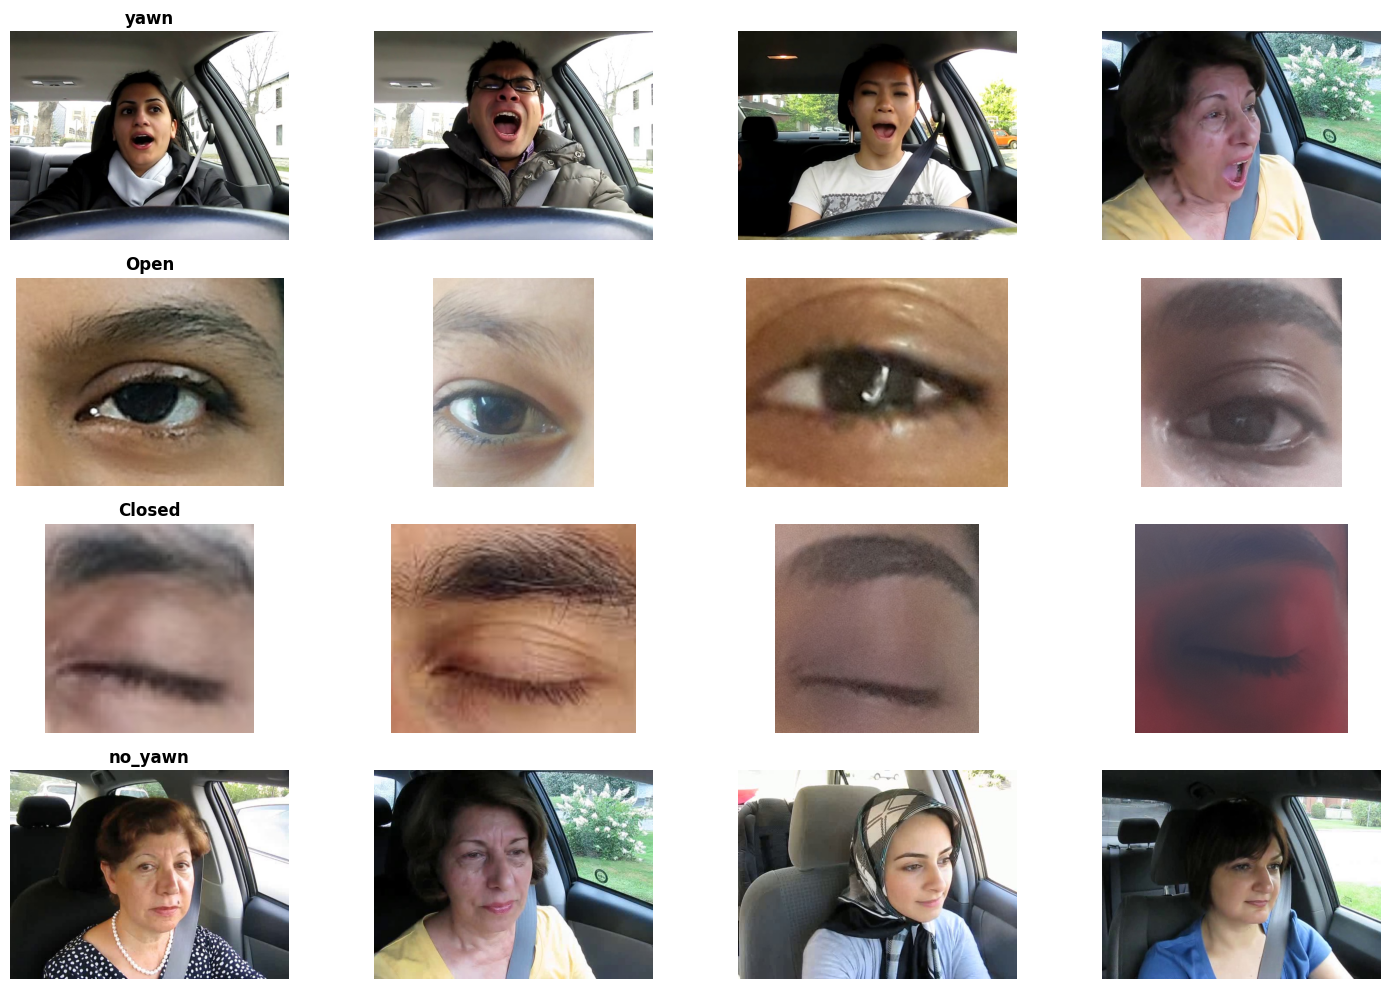

In [5]:
import matplotlib.pyplot as plt
import random
import os
import cv2

# Get class names from the training directory
class_names = os.listdir(train_dir)

# Set the number of images to display per class
num_images_per_class = 4

# Create a figure for visualization
fig, axes = plt.subplots(len(class_names), num_images_per_class, figsize=(15, 10))

for row, class_name in enumerate(class_names):
    class_path = os.path.join(train_dir, class_name)
    image_filenames = os.listdir(class_path)

    # Select random images from the class
    sample_images = random.sample(image_filenames, min(num_images_per_class, len(image_filenames)))

    for col, img_name in enumerate(sample_images):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for Matplotlib

        axes[row, col].imshow(img)
        axes[row, col].axis("off")
        if col == 0:
            axes[row, col].set_title(class_name, fontsize=12, fontweight='bold')  # Set class title

# Adjust layout
plt.tight_layout()
plt.show()



In [6]:
# Check if directories exist
if not os.path.exists(train_dir):
    raise FileNotFoundError(f"Train directory not found: {train_dir}")
if not os.path.exists(test_dir):
    raise FileNotFoundError(f"Test directory not found: {test_dir}")

In [7]:
# Image size and batch size
IMG_SIZE = (150, 150)  # Increased from (64, 64) for better feature extraction
BATCH_SIZE = 32

In [8]:
# Data Augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)


Found 2497 images belonging to 4 classes.
Found 433 images belonging to 4 classes.


In [ ]:
# GoogLeNet Model (InceptionV3)
def build_googlenet_model():
    base_model = keras.applications.InceptionV3(input_shape=(150, 150, 3), include_top=False, weights='imagenet')

    # Unfreeze last few layers for fine-tuning
    for layer in base_model.layers[-20:]:
        layer.trainable = True

    model = keras.Sequential([
        base_model,
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.Dense(512, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(4, activation='softmax')  # Change '4' if more classes
    ])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [10]:
# Build the model
model = build_googlenet_model()

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [15]:
# Train the model
history = model.fit(
    train_generator,
    epochs=10,  # Increased for better learning
    validation_data=test_generator
)


Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 34s 421ms/step - accuracy: 0.9676 - loss: 0.0974 - val_accuracy: 0.9954 - val_loss: 0.0105
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 41s 418ms/step - accuracy: 0.9687 - loss: 0.0892 - val_accuracy: 0.9908 - val_loss: 0.0429
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 33s 420ms/step - accuracy: 0.9718 - loss: 0.0777 - val_accuracy: 0.9954 - val_loss: 0.0080
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 33s 421ms/step - accuracy: 0.9683 - loss: 0.0828 - val_accuracy: 1.0000 - val_loss: 0.0049
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 43s 446ms/step - accuracy: 0.9795 - loss: 0.0715 - val_accuracy: 1.0000 - val_loss: 0.0049
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 32s 408ms/step - accuracy: 0.9811 - loss: 0.0605 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 33s 421ms/step - accuracy: 0.9836 - loss: 0.0421 - val_accuracy: 0.9908 - val_loss: 0.0152
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 33s 417ms/step - accuracy: 0.9770 - loss: 0.0600 - val_accu

In [16]:

# Evaluate the model
eval_loss, eval_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {eval_acc * 100:.2f}%")


14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 160ms/step - accuracy: 0.9947 - loss: 0.0196
Test Accuracy: 99.54%


In [17]:
# Evaluate the model
eval_loss, eval_acc = model.evaluate(train_generator)
print(f"train Accuracy: {eval_acc * 100:.2f}%")


79/79 ━━━━━━━━━━━━━━━━━━━━ 34s 433ms/step - accuracy: 0.9851 - loss: 0.0412
train Accuracy: 98.40%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


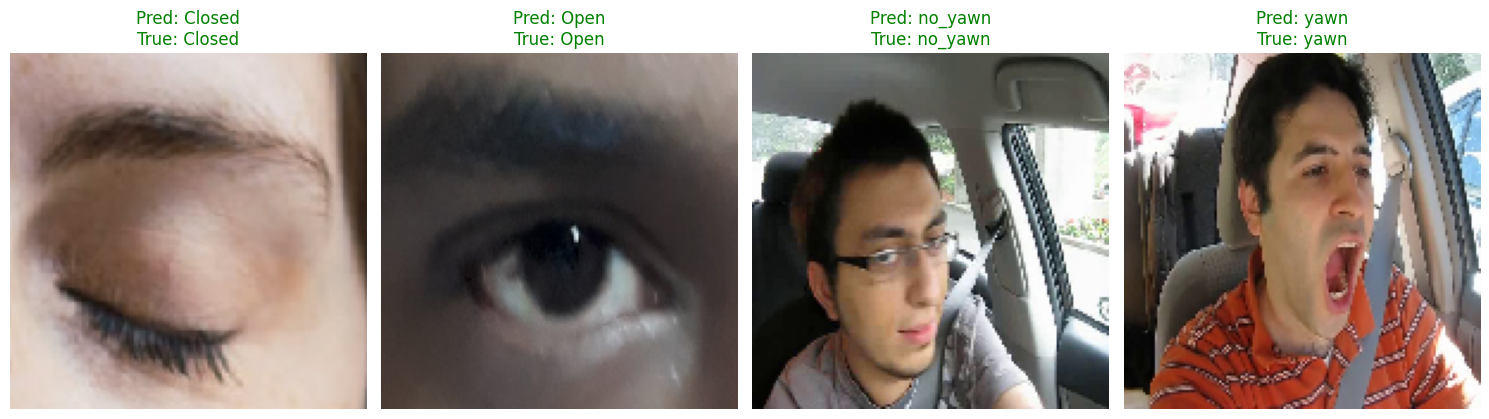

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Get class labels
class_labels = list(test_generator.class_indices.keys())

# Create a dictionary to store images for each class
class_images = {label: None for label in class_labels}
class_found = {label: False for label in class_labels}

# Fetch batches of images until we get at least one image per class
for _ in range(len(test_generator)):
    test_images, test_labels = next(test_generator)

    # Predict the class probabilities
    predictions = model.predict(test_images)
    predicted_labels = np.argmax(predictions, axis=1)
    true_labels = np.argmax(test_labels, axis=1)

    # Iterate through images and store at least one per class
    for img, pred, true in zip(test_images, predicted_labels, true_labels):
        class_name = class_labels[true]
        if not class_found[class_name]:  # Store only the first image found for each class
            class_images[class_name] = (img, class_labels[pred], class_labels[true])
            class_found[class_name] = True

    # Stop if all classes are found
    if all(class_found.values()):
        break

# Plot images with predictions and true labels
fig, axes = plt.subplots(1, len(class_labels), figsize=(15, 5))

for i, class_name in enumerate(class_labels):
    img, pred_label, true_label = class_images[class_name]

    axes[i].imshow(img)
    axes[i].axis("off")
    axes[i].set_title(f"Pred: {pred_label}\nTrue: {true_label}",
                      color="green" if pred_label == true_label else "red")

plt.tight_layout()
plt.show()


In [50]:
print(train_generator.class_indices)  # Shows actual class-to-index mapping


{'Closed': 0, 'Open': 1, 'no_yawn': 2, 'yawn': 3}


In [56]:
import numpy as np
import cv2
from tensorflow.keras.preprocessing import image

# Get actual class labels dynamically from the data generator
class_labels = list(train_generator.class_indices.keys())  # Ensures correct label order

# Function to preprocess image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))  # Resize for model
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize
    return img_array

# Function to predict drowsiness
def predict_drowsiness(model, img_path):
    img_array = preprocess_image(img_path)
    prediction = model.predict(img_array)

    predicted_class_index = np.argmax(prediction)  # Get highest probability index
    predicted_class = class_labels[predicted_class_index]  # Get corresponding class label

    print(f"Predicted Class: {predicted_class}")  # Print actual prediction

    # Corrected decision logic
    if predicted_class == "Closed" or predicted_class == "yawn":  # If eyes closed OR yawning → Drowsy
        print("🚨 Drowsy Alert! Please take a break! 🚨")
    elif predicted_class == "Open" or predicted_class == "no_yawn":  # If eyes open AND no yawn → Alert
        print("✅ You are alert! Stay focused. ✅")
    else:
        print("❓ Unable to determine state.")

# Test the function with an image
test_image_path = "/content/drive/MyDrive/Datasets/train/yawn/1.jpg"  # Replace with actual image path
predict_drowsiness(model, test_image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
Predicted Class: yawn
🚨 Drowsy Alert! Please take a break! 🚨


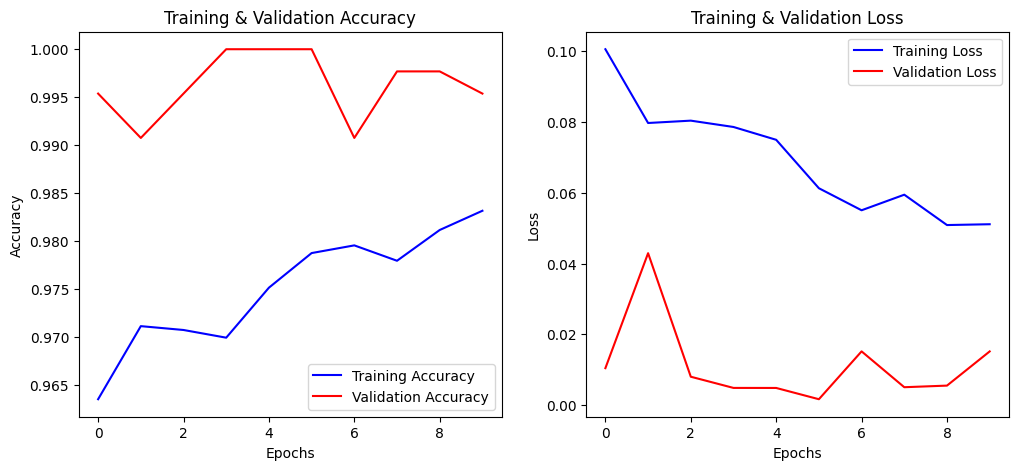

In [57]:
import matplotlib.pyplot as plt

# Plot Accuracy and Loss Curves
def plot_accuracy_loss(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.figure(figsize=(12, 5))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
    plt.title('Training & Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title('Training & Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_accuracy_loss(history)


14/14 ━━━━━━━━━━━━━━━━━━━━ 23s 935ms/step


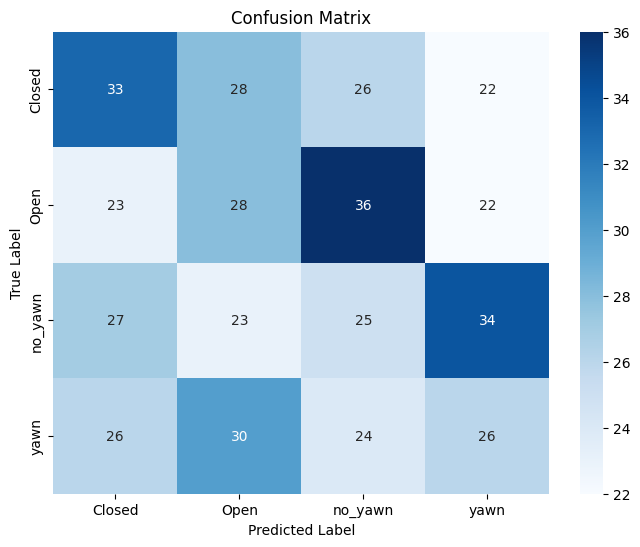

In [58]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get True Labels and Predictions
y_true = test_generator.classes  # True labels
y_pred = model.predict(test_generator)  # Predicted probabilities
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert to class index

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [59]:
from sklearn.metrics import classification_report

# Get classification report
class_report = classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys())
print("Classification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

      Closed       0.30      0.30      0.30       109
        Open       0.26      0.26      0.26       109
     no_yawn       0.23      0.23      0.23       109
        yawn       0.25      0.25      0.25       106

    accuracy                           0.26       433
   macro avg       0.26      0.26      0.26       433
weighted avg       0.26      0.26      0.26       433



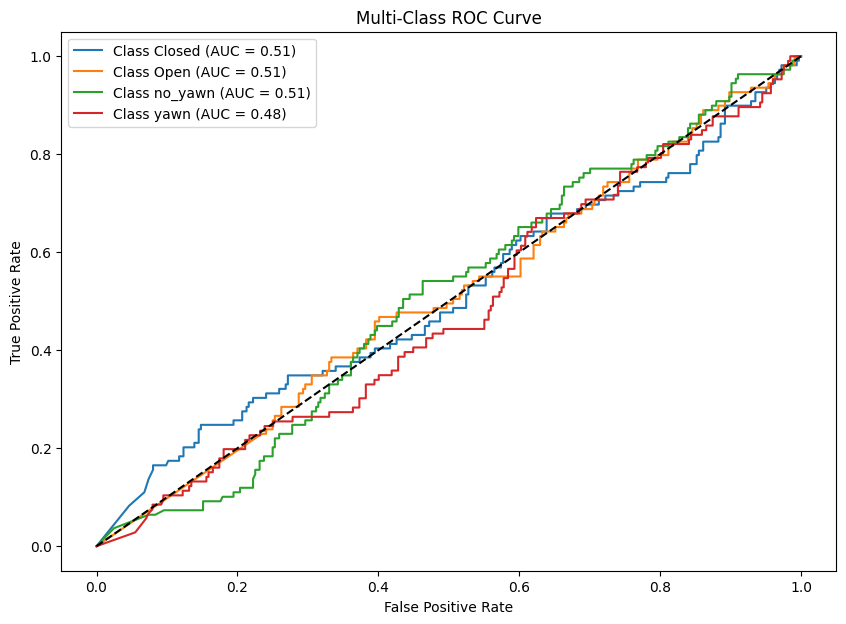

In [60]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the labels for multi-class ROC
y_true_bin = label_binarize(y_true, classes=np.arange(len(test_generator.class_indices)))
n_classes = y_true_bin.shape[1]

plt.figure(figsize=(10, 7))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {list(test_generator.class_indices.keys())[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend()
plt.show()


In [62]:
model.save('/content/drive/MyDrive/saved_model.h5')
